## Preliminary Exploratory Data Analysis

Dataset can be found here https://www.kaggle.com/datasets/nelakurthisudheer/dataset-for-predicting-watering-the-plants by Nelakurthi Sudheer

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [3]:
df = pd.read_csv('soil_data.csv')
df.head()

,Soil Moisture,Temperature,Soil Humidity,Time,Air temperature (C),Wind speed (Km/h),Air humidity (%),Wind gust (Km/h),Pressure (KPa),ph,rainfall,N,P,K,Status
0,54,22,70,21,19.52,2.13,55.04,6.30,101.50,6.502985,202.935536,90.0,42.0,43.0,ON
1,12,20,40,104,19.49,2.01,55.17,10.46,101.50,7.038096,226.655537,85.0,58.0,41.0,OFF
2,34,26,35,62,19.47,1.90,55.30,14.63,101.51,7.840207,263.964248,60.0,55.0,44.0,ON
3,7,44,44,93,19.54,2.28,54.20,16.08,101.51,6.980401,242.864034,74.0,35.0,40.0,OFF
4,50,38,23,92,19.61,2.66,53.09,17.52,101.51,7.628473,262.717340,78.0,42.0,42.0,OFF


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Soil Moisture        100000 non-null  int64  
 1   Temperature          100000 non-null  int64  
 2    Soil Humidity       100000 non-null  int64  
 3   Time                 100000 non-null  int64  
 4   Air temperature (C)  23995 non-null   float64
 5   Wind speed (Km/h)    23995 non-null   float64
 6   Air humidity (%)     23995 non-null   float64
 7   Wind gust (Km/h)     23995 non-null   float64
 8   Pressure (KPa)       23995 non-null   float64
 9   ph                   2200 non-null    float64
 10  rainfall             2200 non-null    float64
 11  N                    2200 non-null    float64
 12  P                    2200 non-null    float64
 13  K                    2200 non-null    float64
 14  Status               100000 non-null  object 
dtypes: float64(10), in

In [5]:
df.shape

(100000, 15)

In [6]:
print("# of ON records: ", df[df['Status'] == 'ON'].shape[0])
print("# of OFF records: ", df[df['Status'] == 'OFF'].shape[0])

# of ON records:  53650
# of OFF records:  46350


In [7]:
#dropping all the null values of air temp
df = df.dropna(axis=0, subset=['Air temperature (C)'])
print("# of ON records: ", df[df['Status'] == 'ON'].shape[0])
print("# of OFF records: ", df[df['Status'] == 'OFF'].shape[0])

# of ON records:  12973
# of OFF records:  11022


note: dataset is still balanced after removing null values from air temp

question: do we still want to keep columns with only 2200 rows? (ph, rainfall, N, P, K)

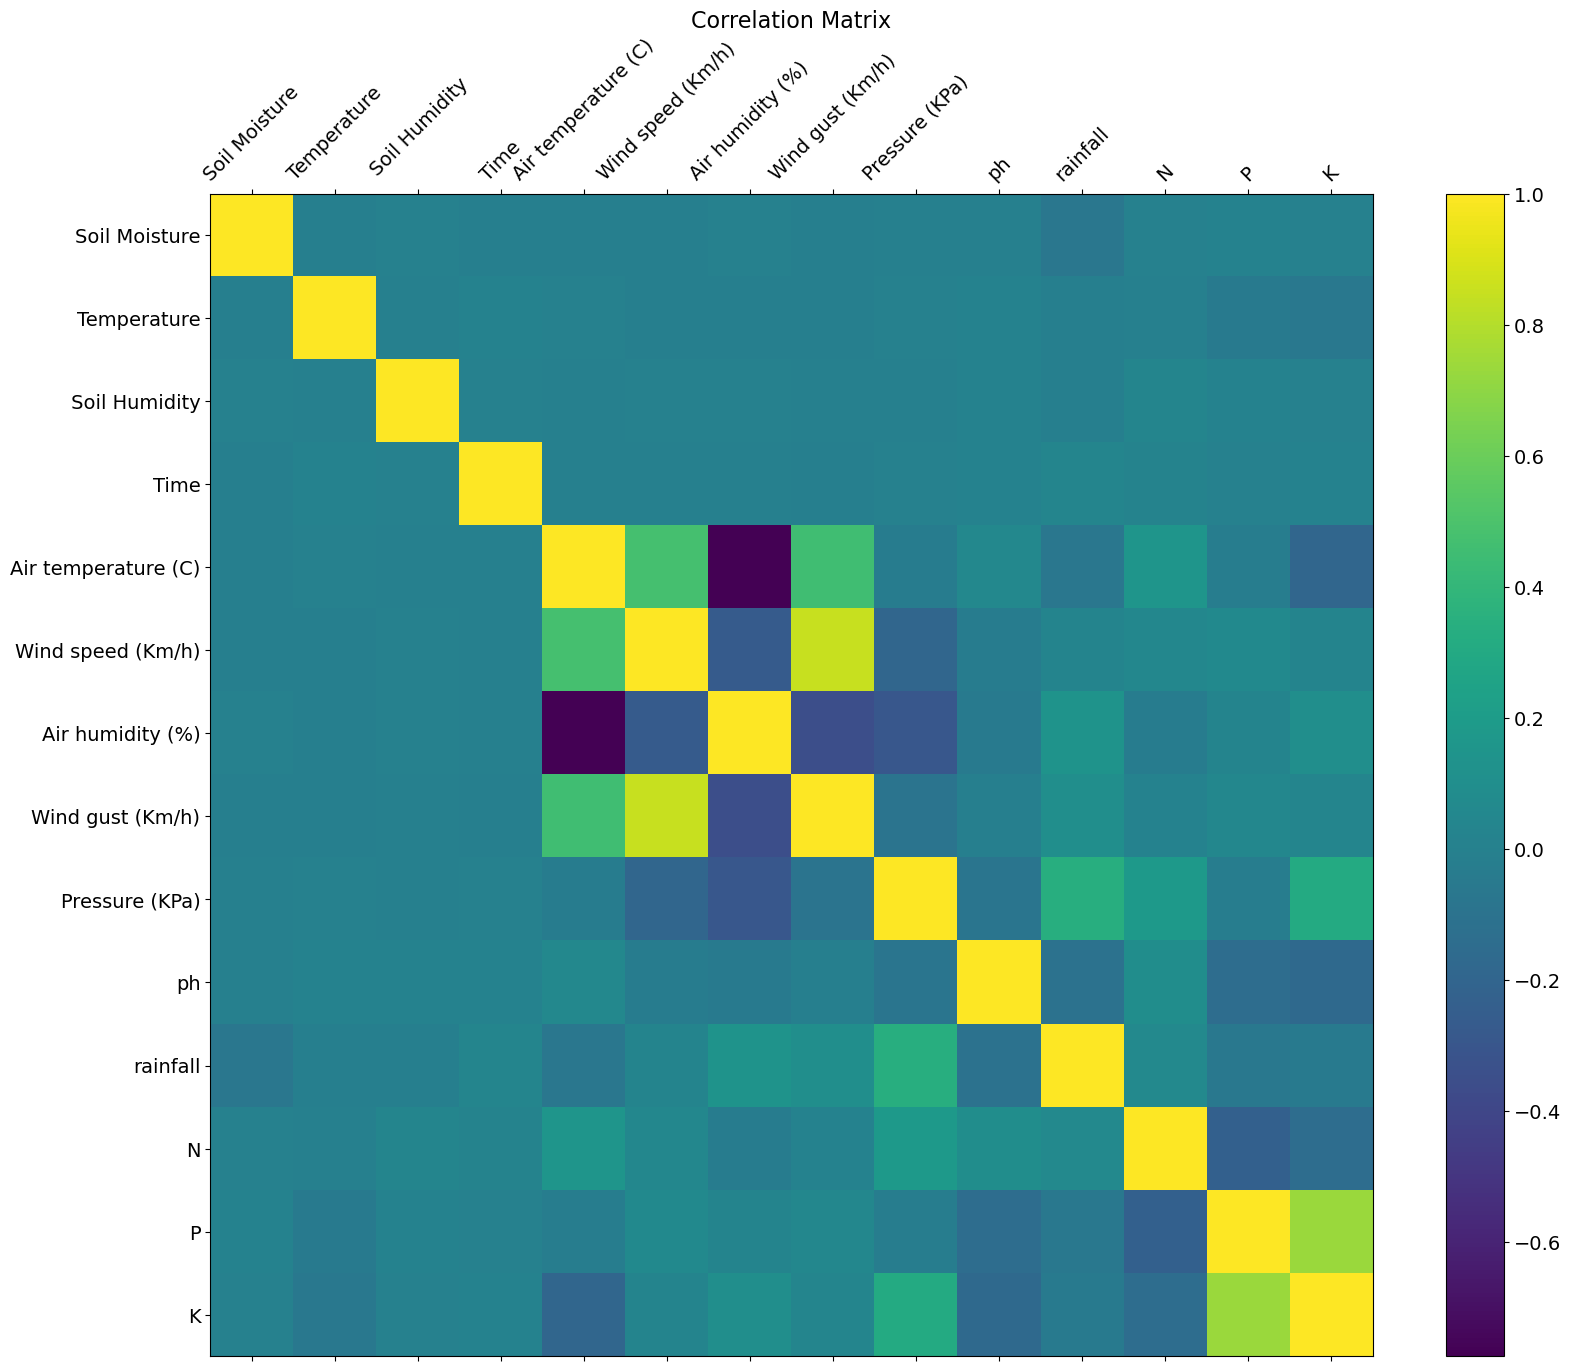

In [9]:
df = df.loc[:, df.columns != 'Status']
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

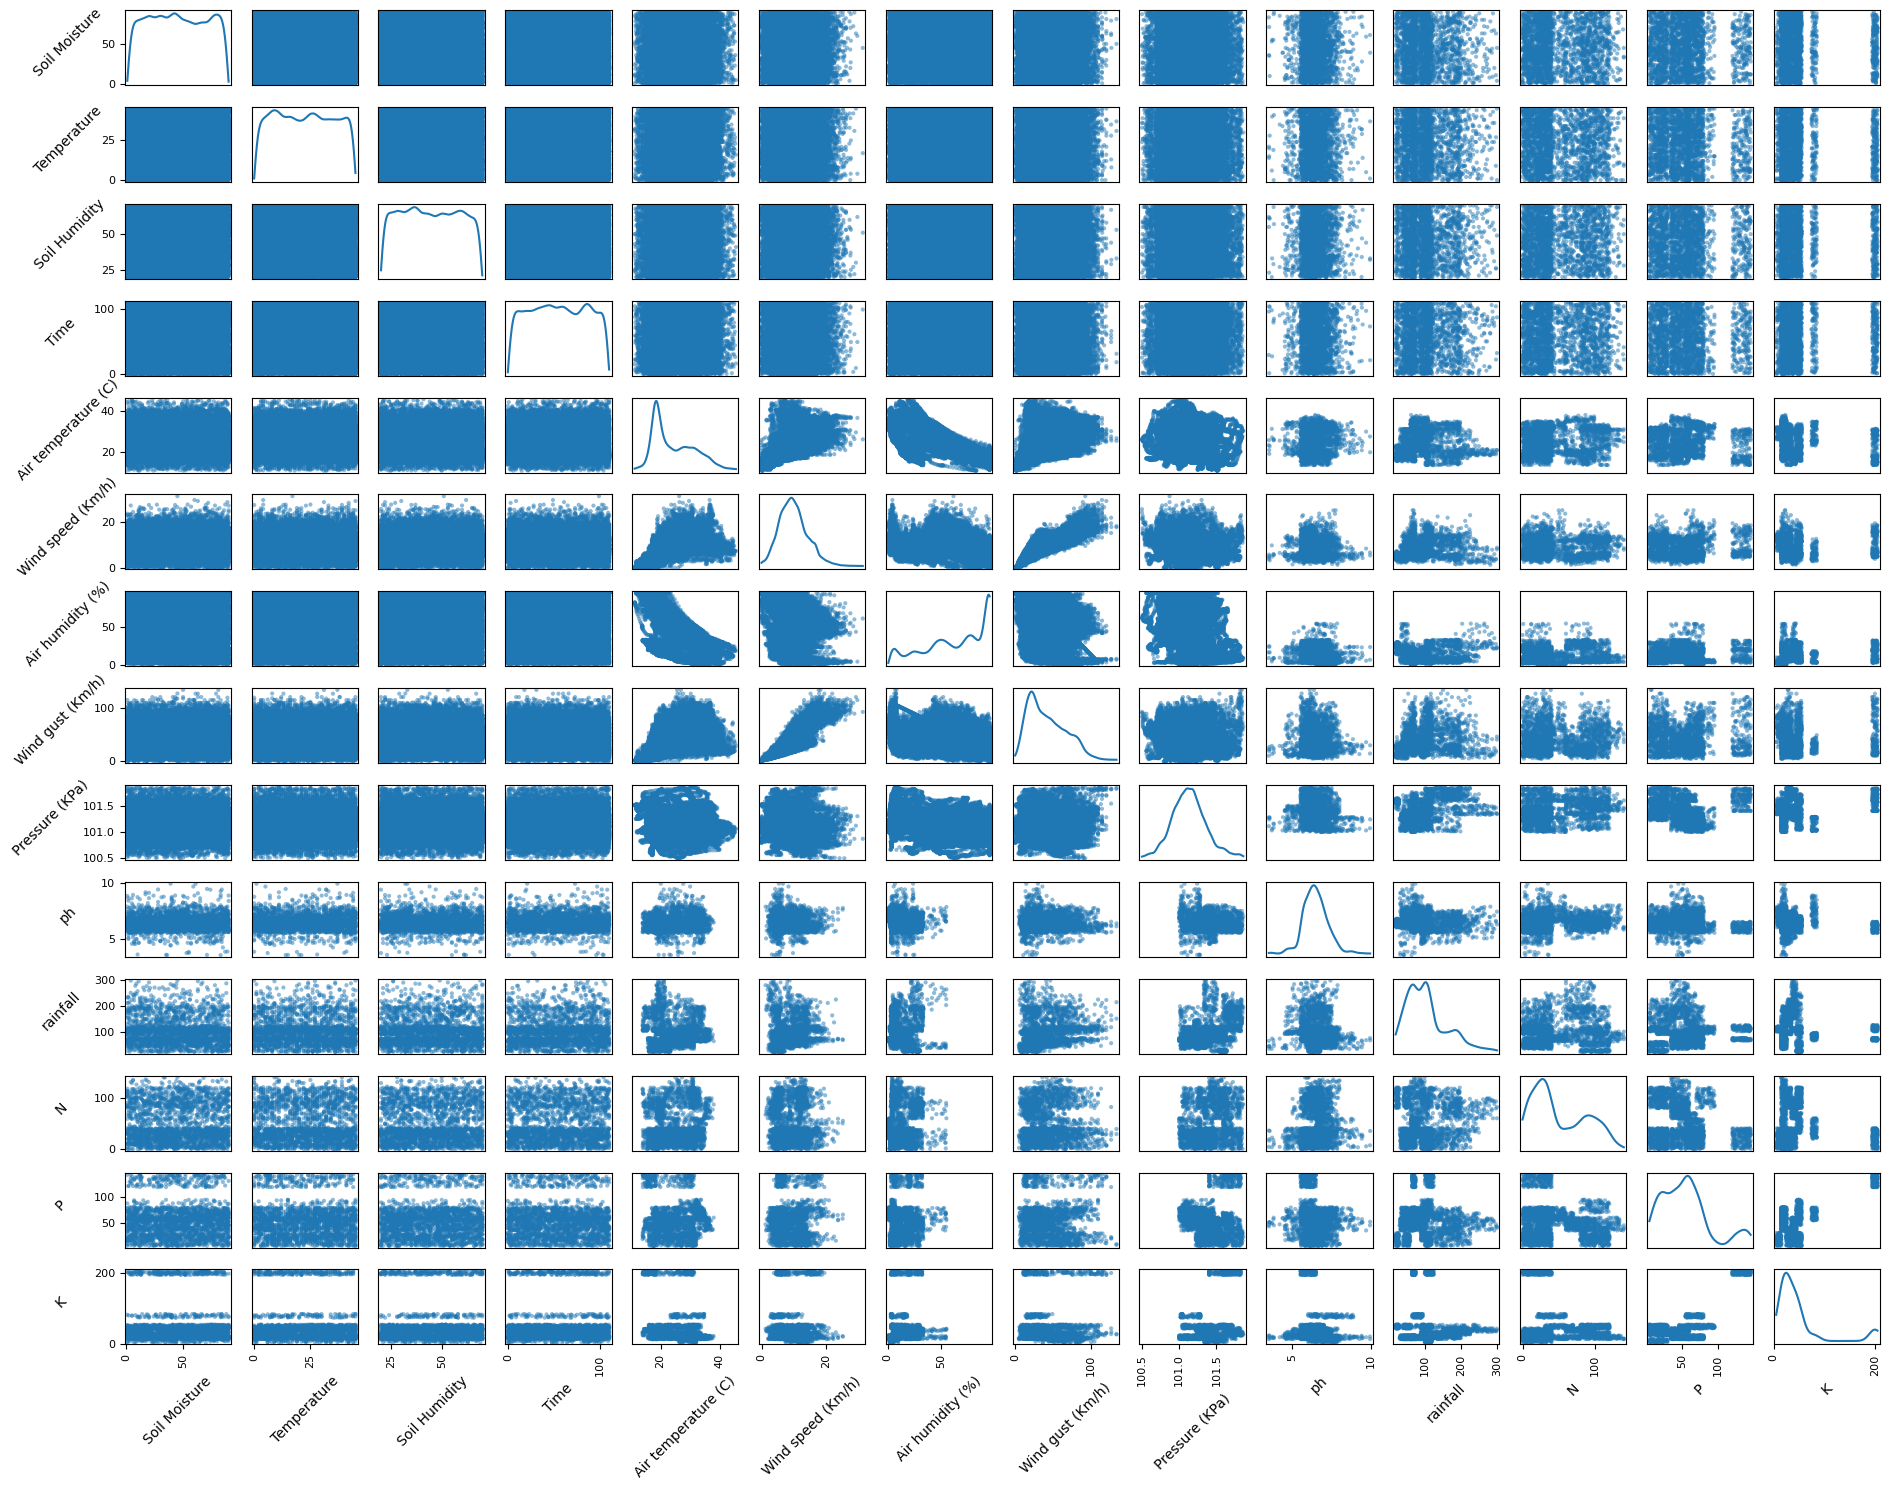

In [30]:
axes = scatter_matrix(df, alpha=0.5, diagonal='kde',figsize=(19, 15)) 
corr = df.corr().to_numpy()

for ax in axes.ravel():
    ax.set_xlabel(ax.get_xlabel(), rotation=45) 
    ax.set_ylabel(ax.get_ylabel(), rotation=45,labelpad=20) 
    
plt.tight_layout()
plt.show()